In [5]:
!pip install micrograd
!pip install graphviz

In [4]:
import math

from graphviz import Digraph
from micrograd.engine import Value

In [20]:
def exp(self):
    e_x = math.exp(self.data)
    out = Value(e_x, (self,), 'exp')

    def _backward():
        self.grad = e_x * out.grad
    out._backward = _backward

    return out

def tanh(self):
    x = self.data
    e_2x = math.exp(2*x)
    t = (e_2x-1)/(e_2x+1)
    out = Value(t, (self,), 'tanh')

    def _backward():
        self.grad = (1 - t**2) * out.grad
    out._backward = _backward

    return out

setattr(Value, 'exp', exp)
setattr(Value, 'tanh', tanh)

In [21]:
def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


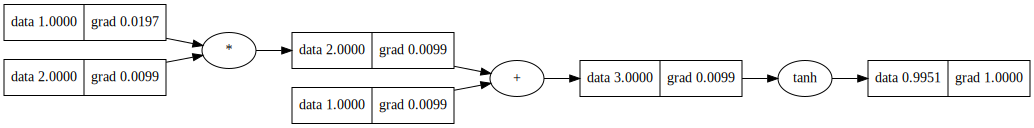

In [26]:
x = Value(1.0)
y = (x * 2 + 1).tanh()
y.backward()
draw_dot(y)

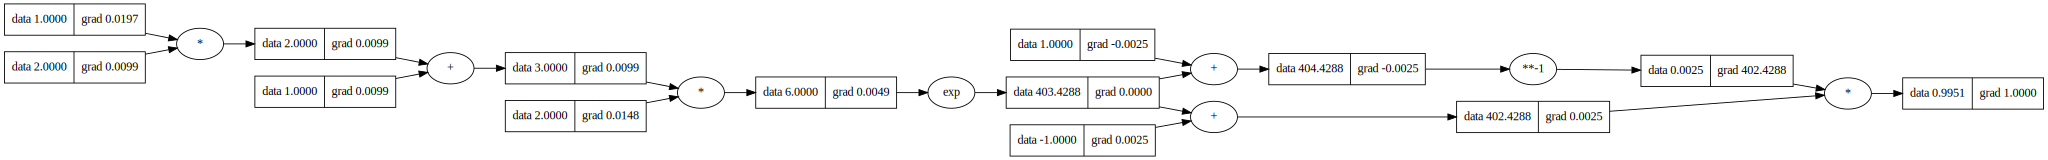

In [29]:
x = Value(1.0)
a = x * 2 + 1
b = (2 * a).exp()
y = (b - 1) / (b + 1)
y.backward()
draw_dot(y)